# Crime data from 2017

http://www.houstontx.gov/police/cs/crime-stats-archives.htm

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import glob, os
import numpy as np
import matplotlib.pyplot as plt
import datetime  as dt
import seaborn as sns

## Data directory

In [3]:
year = '2017'

In [4]:
# data folder path
data_directory = os.path.join('..','data','crime_data/{}'.format(year))
data_directory_saves = os.path.join( '..','data','clean_data/')
premise_dataset = os.path.join('..','data','crime_data/premise_codes.csv')

# combine all fines into one

In [5]:
# combine all files into one df
all_files = glob.glob(os.path.join(data_directory, "*.xls")) 
df_from_each_file = (pd.read_excel(f) for f in all_files)
df   = pd.concat(df_from_each_file, ignore_index=True)

WARNING *** file size (3078551) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119727 entries, 0 to 119726
Data columns (total 13 columns):
# offenses      40378 non-null float64
Beat            119727 non-null object
Block Range     79349 non-null object
BlockRange      40378 non-null object
Date            119727 non-null object
Hour            119727 non-null int64
Offense Type    119727 non-null object
Offenses        79349 non-null float64
Premise         119240 non-null object
Street Name     79349 non-null object
StreetName      40378 non-null object
Suffix          119727 non-null object
Type            119727 non-null object
dtypes: float64(2), int64(1), object(10)
memory usage: 11.9+ MB


In [7]:
df.head(2)

,# offenses,Beat,Block Range,BlockRange,Date,Hour,Offense Type,Offenses,Premise,Street Name,StreetName,Suffix,Type
0,1.0,10H10,NaN,200-299,2017-04-10 00:00:00,15,Burglary,NaN,Residence or House,NaN,CLIFTON,-,-
1,1.0,10H10,NaN,2300-2399,2017-04-11 00:00:00,15,Theft,NaN,Restaurant or Cafeteria Parking Lot,NaN,CANAL,-,ST


## Check for missing values

In [8]:
df.apply(lambda x: sum(x.isnull()))

# offenses      79349
Beat                0
Block Range     40378
BlockRange      79349
Date                0
Hour                0
Offense Type        0
Offenses        40378
Premise           487
Street Name     40378
StreetName      79349
Suffix              0
Type                0
dtype: int64

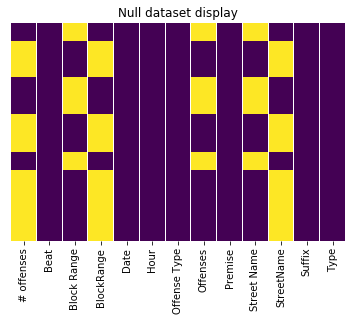

In [9]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Null dataset display')
plt.show()


## Cleanup
- lowercase column names
- renaming

In [10]:
# Map the lowering function to all column names
#df.columns = map(str.lower, df.columns)

In [11]:
df.head()

,# offenses,Beat,Block Range,BlockRange,Date,Hour,Offense Type,Offenses,Premise,Street Name,StreetName,Suffix,Type
0,1.0,10H10,NaN,200-299,2017-04-10 00:00:00,15,Burglary,NaN,Residence or House,NaN,CLIFTON,-,-
1,1.0,10H10,NaN,2300-2399,2017-04-11 00:00:00,15,Theft,NaN,Restaurant or Cafeteria Parking Lot,NaN,CANAL,-,ST
2,1.0,10H10,NaN,2300-2399,2017-04-11 00:00:00,17,Theft,NaN,Restaurant or Cafeteria Parking Lot,NaN,CANAL,-,ST
3,1.0,10H10,NaN,4600-4699,2017-04-12 00:00:00,9,Burglary,NaN,Miscellaneous Business (Non-Specific),NaN,CANAL,-,ST
4,1.0,10H10,NaN,100-199,2017-04-12 00:00:00,19,Theft,NaN,"Other, Unknown, or Not Listed",NaN,ADAM,-,LN


## combine multiple columns into similar


In [12]:
# if duplicate columns

df['BlockRange'] = pd.concat([df['Block Range'].dropna(),
                              df['BlockRange'].dropna()]).reindex_like(df)

df['StreetName'] = pd.concat([df['Street Name'].dropna(),
                              df['StreetName'].dropna()]).reindex_like(df)

df['# offenses'] = pd.concat([df['# offenses'].dropna(),
                              df['Offenses'].dropna()]).reindex_like(df)

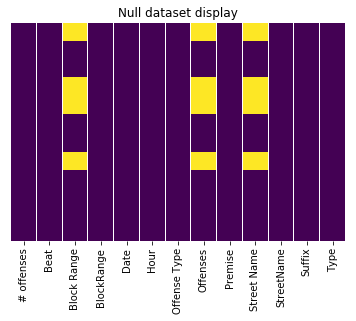

In [13]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Null dataset display')
plt.show()

In [14]:
df.head(2)

,# offenses,Beat,Block Range,BlockRange,Date,Hour,Offense Type,Offenses,Premise,Street Name,StreetName,Suffix,Type
0,1.0,10H10,NaN,200-299,2017-04-10 00:00:00,15,Burglary,NaN,Residence or House,NaN,CLIFTON,-,-
1,1.0,10H10,NaN,2300-2399,2017-04-11 00:00:00,15,Theft,NaN,Restaurant or Cafeteria Parking Lot,NaN,CANAL,-,ST


In [15]:
# Map the lowering function to all column names
df.columns = map(str.lower, df.columns)

In [16]:
df.head(2)

,# offenses,beat,block range,blockrange,date,hour,offense type,offenses,premise,street name,streetname,suffix,type
0,1.0,10H10,NaN,200-299,2017-04-10 00:00:00,15,Burglary,NaN,Residence or House,NaN,CLIFTON,-,-
1,1.0,10H10,NaN,2300-2399,2017-04-11 00:00:00,15,Theft,NaN,Restaurant or Cafeteria Parking Lot,NaN,CANAL,-,ST


In [17]:
df.rename(columns={
    '# offenses': 'num_offenses',
     'offense type': 'offense_type',
    'blockrange': 'block_range',
    'streetname': 'street_name'
}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119727 entries, 0 to 119726
Data columns (total 13 columns):
num_offenses    119727 non-null float64
beat            119727 non-null object
block range     79349 non-null object
block_range     119727 non-null object
date            119727 non-null object
hour            119727 non-null int64
offense_type    119727 non-null object
offenses        79349 non-null float64
premise         119240 non-null object
street name     79349 non-null object
street_name     119727 non-null object
suffix          119727 non-null object
type            119727 non-null object
dtypes: float64(2), int64(1), object(10)
memory usage: 11.9+ MB


In [18]:
df.head(2)

,num_offenses,beat,block range,block_range,date,hour,offense_type,offenses,premise,street name,street_name,suffix,type
0,1.0,10H10,NaN,200-299,2017-04-10 00:00:00,15,Burglary,NaN,Residence or House,NaN,CLIFTON,-,-
1,1.0,10H10,NaN,2300-2399,2017-04-11 00:00:00,15,Theft,NaN,Restaurant or Cafeteria Parking Lot,NaN,CANAL,-,ST


## Drop columns

In [19]:
df.drop(['suffix','type','street name','block range','offenses'],axis=1, inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119727 entries, 0 to 119726
Data columns (total 8 columns):
num_offenses    119727 non-null float64
beat            119727 non-null object
block_range     119727 non-null object
date            119727 non-null object
hour            119727 non-null int64
offense_type    119727 non-null object
premise         119240 non-null object
street_name     119727 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 7.3+ MB


In [21]:
df.head()

,num_offenses,beat,block_range,date,hour,offense_type,premise,street_name
0,1.0,10H10,200-299,2017-04-10 00:00:00,15,Burglary,Residence or House,CLIFTON
1,1.0,10H10,2300-2399,2017-04-11 00:00:00,15,Theft,Restaurant or Cafeteria Parking Lot,CANAL
2,1.0,10H10,2300-2399,2017-04-11 00:00:00,17,Theft,Restaurant or Cafeteria Parking Lot,CANAL
3,1.0,10H10,4600-4699,2017-04-12 00:00:00,9,Burglary,Miscellaneous Business (Non-Specific),CANAL
4,1.0,10H10,100-199,2017-04-12 00:00:00,19,Theft,"Other, Unknown, or Not Listed",ADAM


# Null values

In [22]:
df.apply(lambda x: sum(x.isnull()))

num_offenses      0
beat              0
block_range       0
date              0
hour              0
offense_type      0
premise         487
street_name       0
dtype: int64

In [23]:
df[df.isnull().any(axis=1)][-10:]  # display last 10

,num_offenses,beat,block_range,date,hour,offense_type,premise,street_name
80671,1.0,8C30,8400-8499,2017-03-06 00:00:00,13,Auto Theft,NaN,WOODLYN
80769,1.0,8C60,10600-10699,2017-03-13 00:00:00,11,Burglary,NaN,HIRSCH
80791,1.0,8C60,10700-10799,2017-03-04 00:00:00,18,Aggravated Assault,NaN,HOMESTEAD
80813,1.0,8C60,7400-7499,2017-03-23 00:00:00,18,Aggravated Assault,NaN,SAUNDERS
80844,1.0,9C20,7200-7299,2017-03-13 00:00:00,13,Burglary,NaN,ALDERSON
80864,1.0,9C20,6400-6499,2017-03-07 00:00:00,21,Robbery,NaN,MARKET
80893,1.0,9C30,10300-10399,2017-03-15 00:00:00,0,Theft,NaN,EAST
80932,1.0,9C30,400-499,2017-03-23 00:00:00,10,Burglary,NaN,MERCURY
80997,1.0,9C40,12000-12099,2017-03-08 00:00:00,20,Theft,NaN,EAST
81131,1.0,UNK,10200-10299,2017-03-30 00:00:00,22,Theft,NaN,EAST


### Drop rows with more than 3 null values

In [24]:
df.dropna(thresh=3,inplace=True)

In [25]:
df[df.isnull().any(axis=1)][-10:]  # display last 10

,num_offenses,beat,block_range,date,hour,offense_type,premise,street_name
80671,1.0,8C30,8400-8499,2017-03-06 00:00:00,13,Auto Theft,NaN,WOODLYN
80769,1.0,8C60,10600-10699,2017-03-13 00:00:00,11,Burglary,NaN,HIRSCH
80791,1.0,8C60,10700-10799,2017-03-04 00:00:00,18,Aggravated Assault,NaN,HOMESTEAD
80813,1.0,8C60,7400-7499,2017-03-23 00:00:00,18,Aggravated Assault,NaN,SAUNDERS
80844,1.0,9C20,7200-7299,2017-03-13 00:00:00,13,Burglary,NaN,ALDERSON
80864,1.0,9C20,6400-6499,2017-03-07 00:00:00,21,Robbery,NaN,MARKET
80893,1.0,9C30,10300-10399,2017-03-15 00:00:00,0,Theft,NaN,EAST
80932,1.0,9C30,400-499,2017-03-23 00:00:00,10,Burglary,NaN,MERCURY
80997,1.0,9C40,12000-12099,2017-03-08 00:00:00,20,Theft,NaN,EAST
81131,1.0,UNK,10200-10299,2017-03-30 00:00:00,22,Theft,NaN,EAST


### Replace null values on premise_code to 'none'

In [26]:
df.premise.fillna('UNK',inplace=True)

In [27]:
df.apply(lambda x: sum(x.isnull()))

num_offenses    0
beat            0
block_range     0
date            0
hour            0
offense_type    0
premise         0
street_name     0
dtype: int64

# Inspect each column

## `num_offenses`

In [28]:
df.head()

,num_offenses,beat,block_range,date,hour,offense_type,premise,street_name
0,1.0,10H10,200-299,2017-04-10 00:00:00,15,Burglary,Residence or House,CLIFTON
1,1.0,10H10,2300-2399,2017-04-11 00:00:00,15,Theft,Restaurant or Cafeteria Parking Lot,CANAL
2,1.0,10H10,2300-2399,2017-04-11 00:00:00,17,Theft,Restaurant or Cafeteria Parking Lot,CANAL
3,1.0,10H10,4600-4699,2017-04-12 00:00:00,9,Burglary,Miscellaneous Business (Non-Specific),CANAL
4,1.0,10H10,100-199,2017-04-12 00:00:00,19,Theft,"Other, Unknown, or Not Listed",ADAM


In [29]:
df.num_offenses.value_counts(dropna=False)

1.0     117727
2.0       1661
3.0        227
4.0         70
5.0         21
6.0         10
7.0          7
10.0         2
8.0          2
Name: num_offenses, dtype: int64

In [30]:
df.num_offenses.dtype

dtype('float64')

### Change the type from float to integer

In [31]:
df.num_offenses = df.num_offenses.astype('int')

In [32]:
df.num_offenses.dtype

dtype('int64')

In [33]:
df.num_offenses.value_counts(dropna=False)

1     117727
2       1661
3        227
4         70
5         21
6         10
7          7
10         2
8          2
Name: num_offenses, dtype: int64

## `beat`

In [34]:
len(df.beat.value_counts(dropna='False'))

237

In [35]:
df.beat.unique()

array(['10H10', '10H20', '10H30', '10H40', '10H50', '10H60', '10H70',
       '10H80', '11H10', '11H20', '11H30', '11H40', '11H50', '12D10',
       '12D20', '12D30', '12D40', '12D50', '12D60', '12D70', '13D10',
       '13D20', '13D30', '13D40', '14D10', '14D20', '14D30', '14D40',
       '14D50', '15E10', '15E20', '15E30', '15E40', '16E10', '16E20',
       '16E30', '16E40', '17E10', '17E20', '17E30', '17E40', '18F10',
       '18F20', '18F30', '18F40', '18F50', '18F60', '19G10', '19G20',
       '19G30', '19G40', '19G50', '1A10', '1A20', '1A30', '1A40', '1A50',
       '20G10', '20G20', '20G30', '20G40', '20G50', '20G60', '20G70',
       '20G80', '21I10', '21I20', '21I30', '21I40', '21I50', '21I60',
       '21I70', '23J50', '24C10', '24C20', '24C30', '24C40', '24C50',
       '24C60', '2A10', '2A20', '2A30', '2A40', '2A50', '2A60', '3B10',
       '3B30', '3B40', '3B50', '4F10', '4F20', '4F30', '5F10', '5F20',
       '5F30', '5F40', '6B10', '6B20', '6B30', '6B40', '6B50', '6B60',
       '7C10

In [36]:
df.beat = df.beat.str.strip()

In [37]:
len(df.beat.unique())

120

## `block_range`

In [38]:
len(df.block_range.unique())

320

In [39]:
df.block_range = df.block_range.str.strip()

In [40]:
len(df.block_range.unique())

320

## `date`

In [41]:
df['date'].dtype

dtype('O')

In [42]:
df['date'] = pd.to_datetime(df['date'])

In [43]:
df['date'].dtype

dtype('<M8[ns]')

## `hour`

In [44]:
df.hour.value_counts(dropna=False)

15    7531
14    7386
10    7209
13    7041
16    6970
9     6836
12    6816
11    6751
17    6515
8     6203
18    5951
19    5587
20    5136
7     5051
21    4509
22    4278
23    3738
6     3253
0     2912
1     2372
2     2315
5     1920
3     1784
4     1660
24       3
Name: hour, dtype: int64

In [45]:
df.hour.dtype

dtype('int64')

## Change dtype 

In [46]:
df.hour = df.hour.astype('int')

In [47]:
df.hour.dtype

dtype('int64')

In [48]:
df.hour.value_counts(dropna=False)

15    7531
14    7386
10    7209
13    7041
16    6970
9     6836
12    6816
11    6751
17    6515
8     6203
18    5951
19    5587
20    5136
7     5051
21    4509
22    4278
23    3738
6     3253
0     2912
1     2372
2     2315
5     1920
3     1784
4     1660
24       3
Name: hour, dtype: int64

## `offense_type`

In [49]:
df.offense_type.value_counts(dropna=False)

Theft                        61411
Burglary                     15713
Aggravated Assault           11156
Robbery                       8956
AutoTheft                     6649
Theft                         6011
Auto Theft                    3874
Burglary                      1371
Rape                          1239
Aggravated Assault            1158
AutoTheft                      978
Robbery                        822
Murder                         235
Rape                           129
Murder                          23
1                                2
Name: offense_type, dtype: int64

In [50]:
df.offense_type.unique()

array(['Burglary', 'Theft', 'Robbery', 'Auto Theft', 'Aggravated Assault',
       'Rape', 'Murder', 'AutoTheft', 1, 'Burglary                 ',
       'Robbery                  ', 'Theft                    ',
       'AutoTheft                ', 'Aggravated Assault       ',
       'Rape                     ', 'Murder                   '],
      dtype=object)

In [51]:
df.offense_type = df.offense_type.str.strip()

In [52]:
df.offense_type.unique()

array(['Burglary', 'Theft', 'Robbery', 'Auto Theft', 'Aggravated Assault',
       'Rape', 'Murder', 'AutoTheft', nan], dtype=object)

In [53]:
df.offense_type.value_counts(dropna=False)

Theft                 67422
Burglary              17084
Aggravated Assault    12314
Robbery                9778
AutoTheft              7627
Auto Theft             3874
Rape                   1368
Murder                  258
NaN                       2
Name: offense_type, dtype: int64

In [54]:
df.offense_type.replace({'AutoTheft':'Auto Theft'}, inplace=True)

In [55]:
df.offense_type.value_counts(dropna=False)

Theft                 67422
Burglary              17084
Aggravated Assault    12314
Auto Theft            11501
Robbery                9778
Rape                   1368
Murder                  258
NaN                       2
Name: offense_type, dtype: int64

## `street_name`

In [56]:
len(df.street_name.value_counts(dropna=False))

21587

In [57]:
df.street_name.value_counts(dropna=False)[:10]

WESTHEIMER       1993
WESTHEIMER RD    1230
GESSNER           980
NORTH             839
GULF              785
LOOP              778
SAM HOUSTON       759
RICHMOND          741
KATY              713
NORTHWEST         667
Name: street_name, dtype: int64

In [58]:
df.street_name.unique()

array(['CLIFTON', 'CANAL', 'ADAM', ..., 'GREEN LAKER', 'STAFFORD RD',
       'TEALGATE'], dtype=object)

In [59]:
df.street_name = df.street_name.str.strip()  # no need

In [60]:
len(df.street_name.value_counts(dropna=False))

18672

In [61]:
df.street_name = df.street_name.str.upper()

In [62]:
len(df.street_name.value_counts(dropna=False))

18672

## Organiaze columns

In [63]:
df.head()

,num_offenses,beat,block_range,date,hour,offense_type,premise,street_name
0,1,10H10,200-299,2017-04-10,15,Burglary,Residence or House,CLIFTON
1,1,10H10,2300-2399,2017-04-11,15,Theft,Restaurant or Cafeteria Parking Lot,CANAL
2,1,10H10,2300-2399,2017-04-11,17,Theft,Restaurant or Cafeteria Parking Lot,CANAL
3,1,10H10,4600-4699,2017-04-12,9,Burglary,Miscellaneous Business (Non-Specific),CANAL
4,1,10H10,100-199,2017-04-12,19,Theft,"Other, Unknown, or Not Listed",ADAM


In [64]:
# order that I want
cols = ['date','hour','beat','offense_type','block_range','street_name','premise','num_offenses']

In [65]:
df = df.reindex(columns=cols)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119727 entries, 0 to 119726
Data columns (total 8 columns):
date            119727 non-null datetime64[ns]
hour            119727 non-null int64
beat            119727 non-null object
offense_type    119725 non-null object
block_range     119727 non-null object
street_name     119718 non-null object
premise         119727 non-null object
num_offenses    119727 non-null int64
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 8.2+ MB


In [67]:
df.head()

,date,hour,beat,offense_type,block_range,street_name,premise,num_offenses
0,2017-04-10,15,10H10,Burglary,200-299,CLIFTON,Residence or House,1
1,2017-04-11,15,10H10,Theft,2300-2399,CANAL,Restaurant or Cafeteria Parking Lot,1
2,2017-04-11,17,10H10,Theft,2300-2399,CANAL,Restaurant or Cafeteria Parking Lot,1
3,2017-04-12,9,10H10,Burglary,4600-4699,CANAL,Miscellaneous Business (Non-Specific),1
4,2017-04-12,19,10H10,Theft,100-199,ADAM,"Other, Unknown, or Not Listed",1


## display null values

In [68]:
df.apply(lambda x: sum(x.isnull()))

date            0
hour            0
beat            0
offense_type    2
block_range     0
street_name     9
premise         0
num_offenses    0
dtype: int64

In [69]:
df[df.isnull().any(axis=1)][-10:]  # display last 10

,date,hour,beat,offense_type,block_range,street_name,premise,num_offenses
30725,2017-02-19,14,11H10,Aggravated Assault,UNK,NaN,Residence or House,1
34148,2017-02-03,8,18F60,Theft,UNK,NaN,Hotel or Motel Parking Lot,1
35775,2017-02-15,23,20G40,NaN,1400-1499,DAIRY ASHFORD,Apartment,1
36763,2017-02-25,9,2A30,Theft,UNK,NaN,"Road, Street, or Sidewalk",1
36793,2016-12-22,13,2A30,Theft,UNK,NaN,Alley,1
38357,2016-12-31,1,6B20,NaN,4200-4299,OAK SHADOWS,Residence or House,1
46888,2017-01-26,13,2A30,Burglary,UNK,NaN,Residence or House,1
46986,2017-01-16,15,2A30,Theft,UNK,NaN,Residence or House,1
47008,2017-01-20,22,2A30,Theft,UNK,NaN,"Road, Street, or Sidewalk",1
78016,2017-03-11,0,2A30,Burglary,UNK,NaN,"Vacant Single Occ Resd(House,Townhs,Dplex)",1


## Drop null street_name

In [70]:
df.dropna(subset=['street_name'],inplace=True)

In [71]:
df.apply(lambda x: sum(x.isnull()))

date            0
hour            0
beat            0
offense_type    2
block_range     0
street_name     0
premise         0
num_offenses    0
dtype: int64

## Investivate offense_type

In [72]:
df = df.reset_index(drop=True)

In [73]:

df[df.isnull().any(axis=1)]

,date,hour,beat,offense_type,block_range,street_name,premise,num_offenses
35772,2017-02-15,23,20G40,NaN,1400-1499,DAIRY ASHFORD,Apartment,1
38352,2016-12-31,1,6B20,NaN,4200-4299,OAK SHADOWS,Residence or House,1


In [74]:
da = df.street_name =='DAIRY ASHFORD'
br = df.block_range == '1400-1499'

df[da&br].offense_type.value_counts()

Theft       5
Burglary    1
Name: offense_type, dtype: int64

In [75]:
br = df.block_range == '4200-4299'

os = df.street_name =='OAK SHADOWS'
df[os&br].offense_type.value_counts()

Robbery               1
Aggravated Assault    1
Name: offense_type, dtype: int64

In [76]:
df[os&br]  ## 	Aggravated Assault	

,date,hour,beat,offense_type,block_range,street_name,premise,num_offenses
38352,2016-12-31,1,6B20,NaN,4200-4299,OAK SHADOWS,Residence or House,1
52209,2017-07-20,22,14D10,Robbery,4200-4299,OAK SHADOWS,Service or Gas Station,1
79668,2017-03-09,13,6B20,Aggravated Assault,4200-4299,OAK SHADOWS,Residence or House,1


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119718 entries, 0 to 119717
Data columns (total 8 columns):
date            119718 non-null datetime64[ns]
hour            119718 non-null int64
beat            119718 non-null object
offense_type    119716 non-null object
block_range     119718 non-null object
street_name     119718 non-null object
premise         119718 non-null object
num_offenses    119718 non-null int64
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 7.3+ MB


In [78]:
df[df.isnull().any(axis=1)]

,date,hour,beat,offense_type,block_range,street_name,premise,num_offenses
35772,2017-02-15,23,20G40,NaN,1400-1499,DAIRY ASHFORD,Apartment,1
38352,2016-12-31,1,6B20,NaN,4200-4299,OAK SHADOWS,Residence or House,1


## Theft is most popular so replace null with Theft

In [79]:
df.iloc[35772, df.columns.get_loc('offense_type')] = 'Theft'

In [80]:
df[df.isnull().any(axis=1)]

,date,hour,beat,offense_type,block_range,street_name,premise,num_offenses
38352,2016-12-31,1,6B20,NaN,4200-4299,OAK SHADOWS,Residence or House,1


In [81]:
df.iloc[38352, df.columns.get_loc('offense_type')] = 'Aggravated Assault'

In [82]:
df[df.isnull().any(axis=1)]

,date,hour,beat,offense_type,block_range,street_name,premise,num_offenses


## Save clean data

In [83]:
data_directory_saves

'../data/clean_data/'

In [84]:
df.to_csv(data_directory_saves+'crime_2017.csv')

offense_type as wrong value that neets to  be changed